# This script includes: 

## 1. Import libraries
## 2. Import data
## 3. Random forest model on all stations for one decade
    3.1 Random Search Optimization
    3.2 Grid Search Optimization
    3.3 Run optimized random forest Model on all stations for 2010s
## 4. Random forest model on top station for all years
    4.1 Random Search Optimization
    4.2 Grid Search Optimization
    4.3 Run optimized random forest model on top station for all years

## 1. Import libraries

In [43]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import datetime
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

## 2. Import data

In [95]:
# Import data

path = r'C:\Users\ashle\Documents\10-2024 Climate Analysis'

df_weather_decade = pd.read_csv(os.path.join(path, '02 Data Sets', 'weather_data_filtered_2010s.csv'),index_col = False) 
df_pleasant_decade = pd.read_csv(os.path.join(path, '02 Data Sets', 'pleasant_data_filtered_2010s.csv'),index_col = False) 
df_dusseldorf_weather = pd.read_csv(os.path.join(path, '02 Data Sets', 'dusseldorf_data_all_years.csv'),index_col = False)
df_dusseldorf_pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'dusseldorf_pleasant_all_years.csv'),index_col = False)

## 3. Random forest model on all stations for one decade

In [24]:
df_weather_decade.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  8            0.93          0.9965                    0.18   
1                  3            0.74          1.0193                    0.58   
2                  3            0.75          1.0226                    0.61   
3                  5            0.83          1.0169                    0.48   
4                  7            0.78          1.0073                    0.53   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.56             0.0              2.9            -0.2   
1                 0.00             5.2             -1.5            -4.2   
2                 0.00             6.3             -3.2            -6.0   
3                 0.00             3.7             -4.9            -8.3   
4                 0.04             4.4             -4.0            -7.1   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0             4.8                     6  ...                -7.0   
1             0.4                     8  ...                -7.1   
2             1.1                     7  ...                -7.1   
3            -3.1                     2  ...                -3.6   
4            -1.5                     6  ...                -5.5   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     1               0.80             1.0121   
1                     1               0.82             1.0196   
2                     4               0.71             1.0196   
3                     2               0.67             1.0219   
4                     4               0.78             1.0117   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.43                    0.00                6.0   
1                       0.45                    0.00                6.0   
2                       0.36                    0.41                1.6   
3                       0.48                    0.51                6.5   
4                       0.45                    0.09                4.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 1.7               -1.6                5.0  
1                 0.8               -4.5                6.2  
2                 0.5               -4.1                5.1  
3                 3.7                1.3                3.8  
4                 2.3               -0.7                5.4  

[5 rows x 135 columns]

In [26]:
df_pleasant_decade.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [28]:
feature_names = df_weather_decade.columns

# Convert X and y into numpy arrays
X = df_weather_decade.to_numpy()
y = df_pleasant_decade.to_numpy()

In [30]:
# Check the shapes
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (3652, 135)
y shape:  (3652, 15)


In [32]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2556, 135) (2556, 15)
(1096, 135) (1096, 15)


### 3.1 Random Search Optimization

In [37]:
# Random search cv
rs_space={'max_depth':[5, 10, 15, 20, 25, None],
              'n_estimators':np.arange(50, 300, step=50),
              'max_features':randint(10, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(2,10),
              'min_samples_split':np.arange(2, 10, step=1)
         }

In [39]:
# creating a RF classifier
clf= RandomForestClassifier()

In [45]:
start = time.time()
rf_random = RandomizedSearchCV(clf, rs_space, n_iter=200, scoring='f1_weighted', verbose=2, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 13.725183820724487 minutes


In [46]:
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       305
           1       0.92      0.97      0.94       417
           2       0.91      0.99      0.95       390
           3       0.94      0.88      0.91       241
           4       0.95      0.96      0.96       263
           5       0.87      0.81      0.84       253
           6       0.91      0.65      0.75        93
           7       0.97      0.97      0.97       332
           8       0.95      0.98      0.96       263
           9       0.86      1.00      0.92       522
          10       0.94      0.93      0.94       271
          11       0.93      0.71      0.80       160
          12       0.00      0.00      0.00         0
          13       0.91      0.81      0.86       233
          14       0.00      0.00      0.00         0

   micro avg       0.92      0.93      0.92      3743
   macro avg       0.80      0.77      0.78      3743
weighted avg       0.92   

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

In [47]:
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 67, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 250}
Best RANDOM search score is: 0.9078279006455702


### 3.2 Grid Search Optimization

In [66]:
# Grid search cv
grid_space={'max_depth':[10, 20, 30, None],
               'n_estimators':[50,100,200],
              'max_features':[10, 50, 100],
            'criterion':['gini','entropy'],
              'min_samples_leaf':[1,5, 10],
              'min_samples_split':[2, 5, 10]
           }

In [68]:
# creating a RF classifier
clf2 = RandomForestClassifier()

In [70]:
start = time.time()
grid = GridSearchCV(clf2,param_grid=grid_space, scoring='f1_weighted', verbose=2, n_jobs=-1, cv=3)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Search took 25.334136935075126 minutes


In [71]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       305
           1       0.92      0.96      0.94       417
           2       0.92      0.99      0.95       390
           3       0.95      0.89      0.92       241
           4       0.96      0.94      0.95       263
           5       0.87      0.83      0.85       253
           6       0.89      0.63      0.74        93
           7       0.97      0.97      0.97       332
           8       0.95      0.97      0.96       263
           9       0.87      1.00      0.93       522
          10       0.95      0.92      0.94       271
          11       0.92      0.69      0.79       160
          12       0.00      0.00      0.00         0
          13       0.92      0.79      0.85       233
          14       0.00      0.00      0.00         0

   micro avg       0.93      0.92      0.92      3743
   macro avg       0.80      0.77      0.78      3743
weighted avg       0.93   

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

In [88]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.9110866694988222


### 3.3 Run optimized random forest Model on all stations for 2010s

In [76]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=30, max_features=50, min_samples_leaf=1, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=50)

In [78]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Print model accuracy
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy:  0.6687956204379562

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       305
           1       0.92      0.96      0.94       417
           2       0.92      0.99      0.95       390
           3       0.95      0.87      0.91       241
           4       0.97      0.95      0.96       263
           5       0.88      0.79      0.83       253
           6       0.95      0.62      0.75        93
           7       0.97      0.97      0.97       332
           8       0.94      0.96      0.95       263
           9       0.87      1.00      0.93       522
          10       0.96      0.94      0.95       271
          11       0.93      0.71      0.80       160
          12       0.00      0.00      0.00         0
          13       0.92      0.82      0.87       233
          14       0.00      0.00      0.00         0

   micro avg       0.93      0.92      0.93      3743
   macro avg       

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

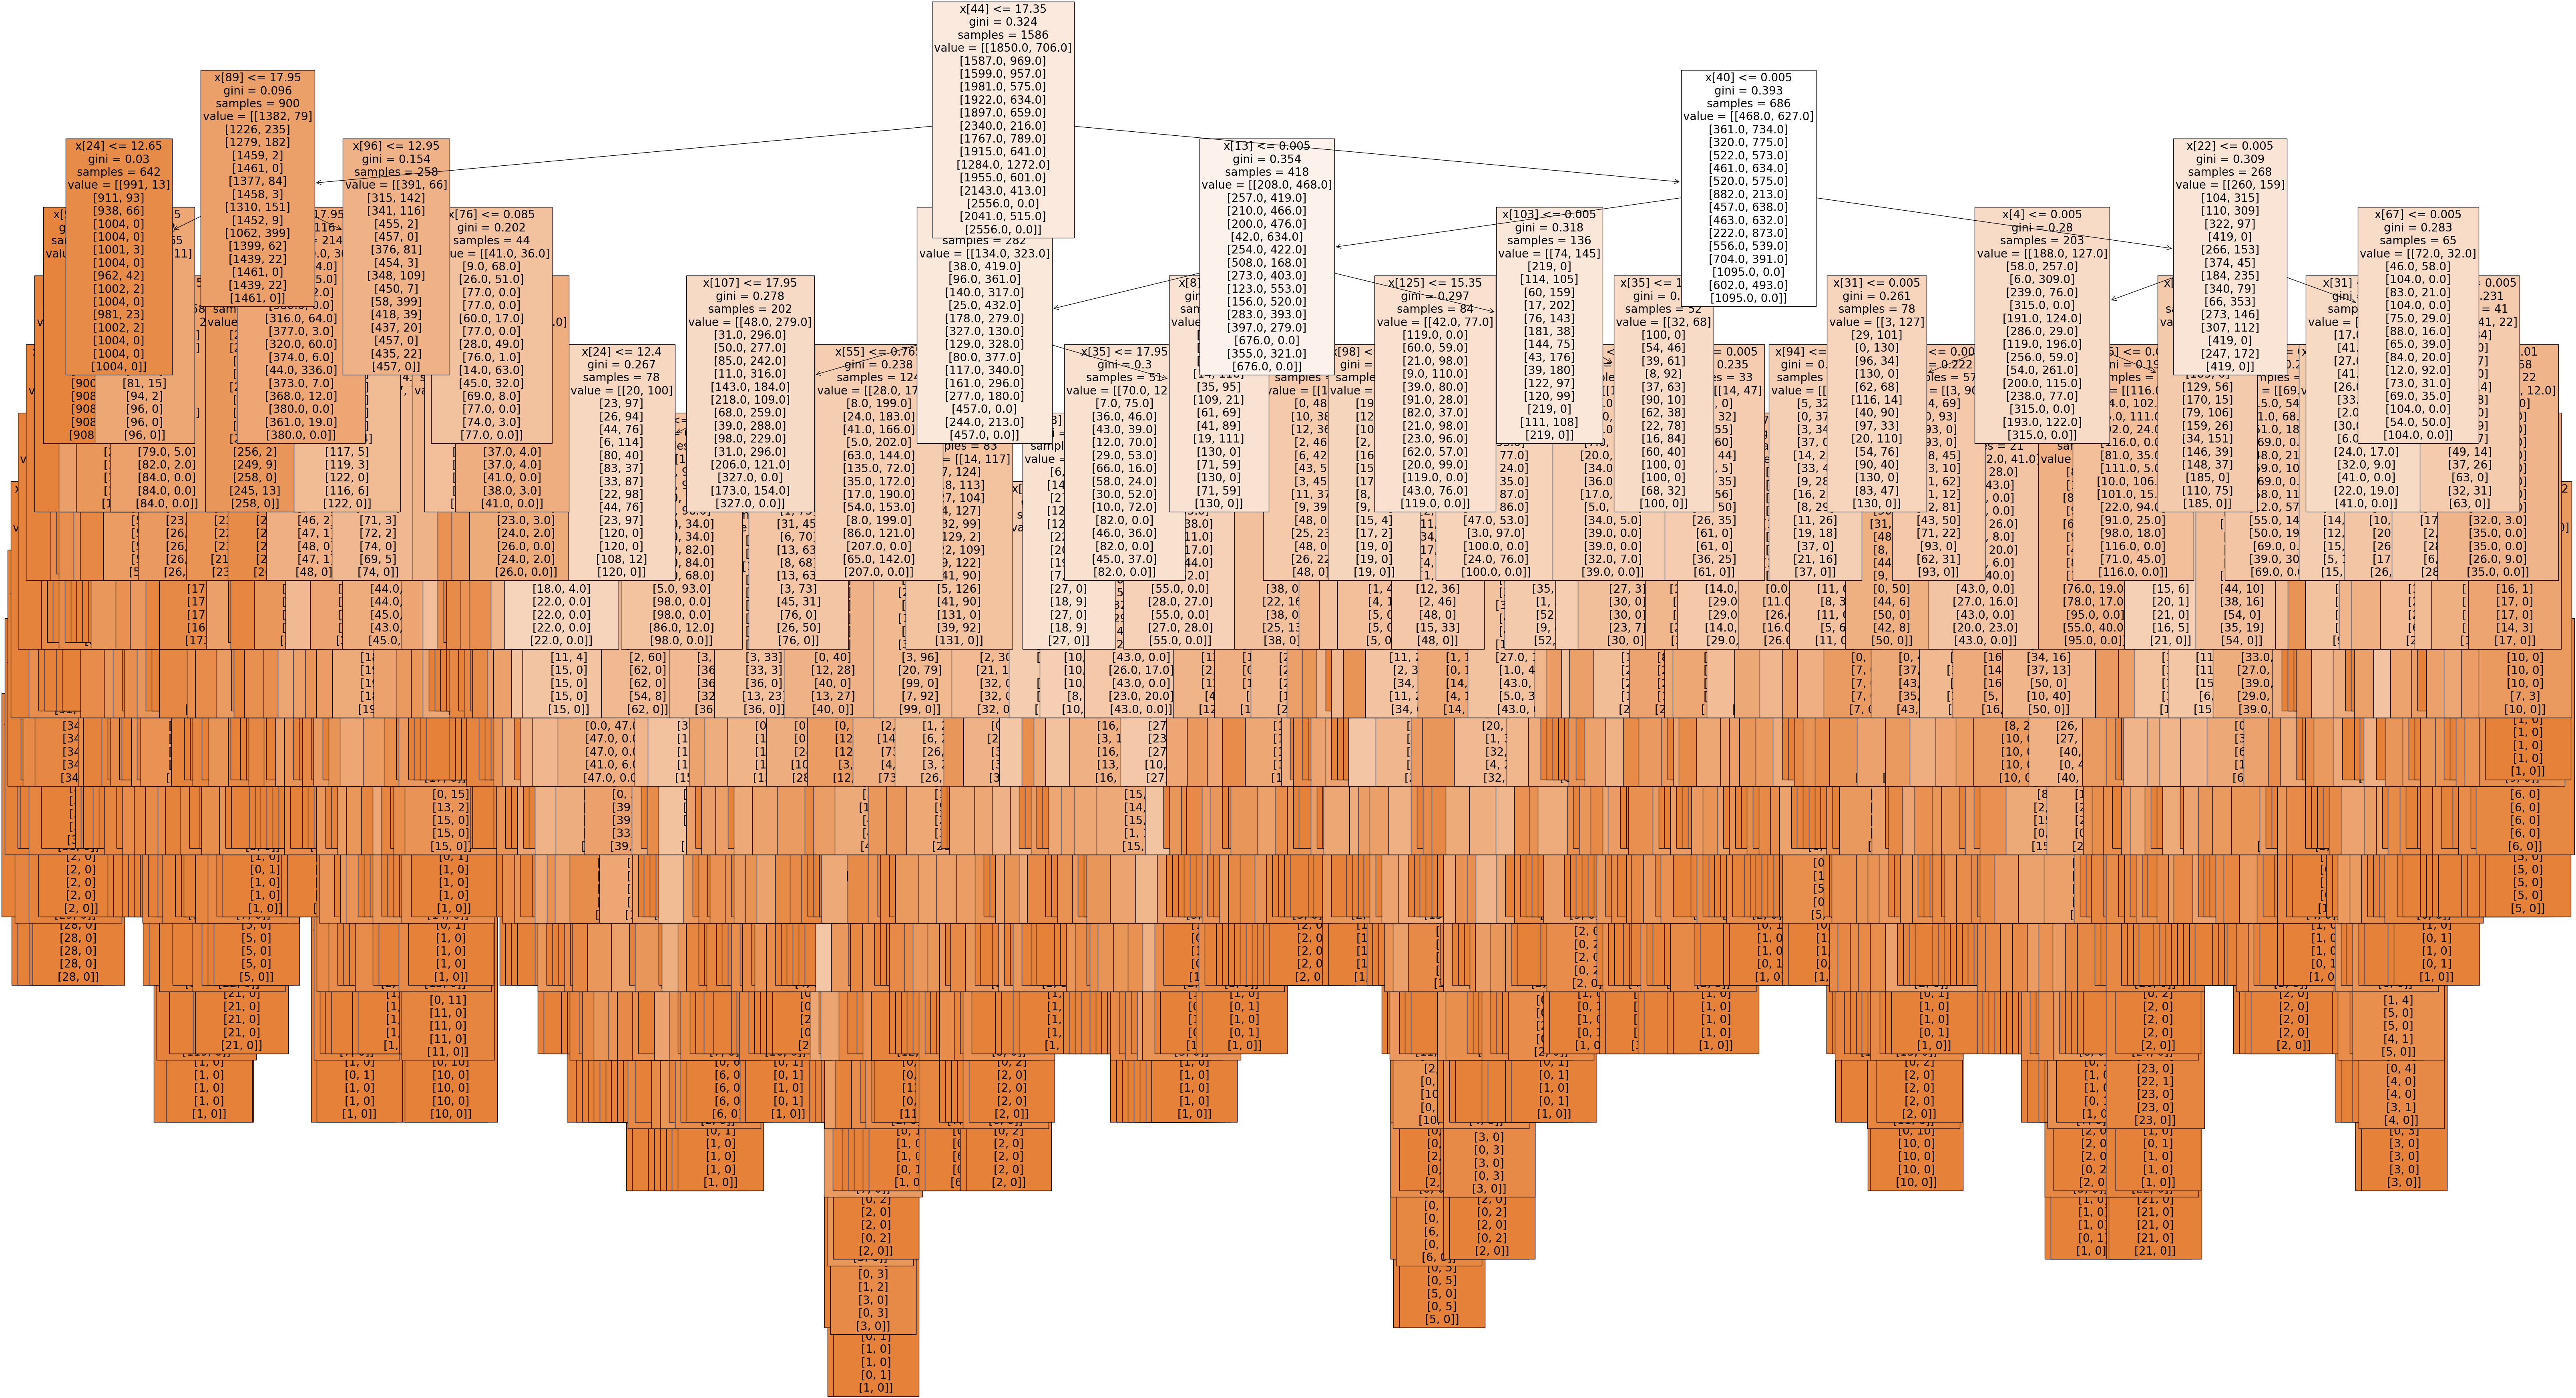

In [80]:
# Define the labels
labels = ['pleasant', 'unpleasant']

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[1], fontsize = 20, class_names=labels, filled=True);

In [82]:
# Extract feature importances
important = clf3.feature_importances_

# Reshape feature importances
important_reshaped = important.reshape(-1, 15, 9)

# Combine into one observation for each weather station
weather_station_importance = np.sum(important_reshaped, axis=2).flatten()

# Verify the shape to confirm it is now (15,)
print(weather_station_importance.shape)  # Should print (15,)

print("Weather station importances:\n", weather_station_importance)

(15,)
Weather station importances:
 [0.11421934 0.05210302 0.05924936 0.07498972 0.17321741 0.04547575
 0.02676091 0.06973158 0.13514717 0.07167223 0.07234205 0.04483199
 0.01895314 0.03812747 0.00317885]


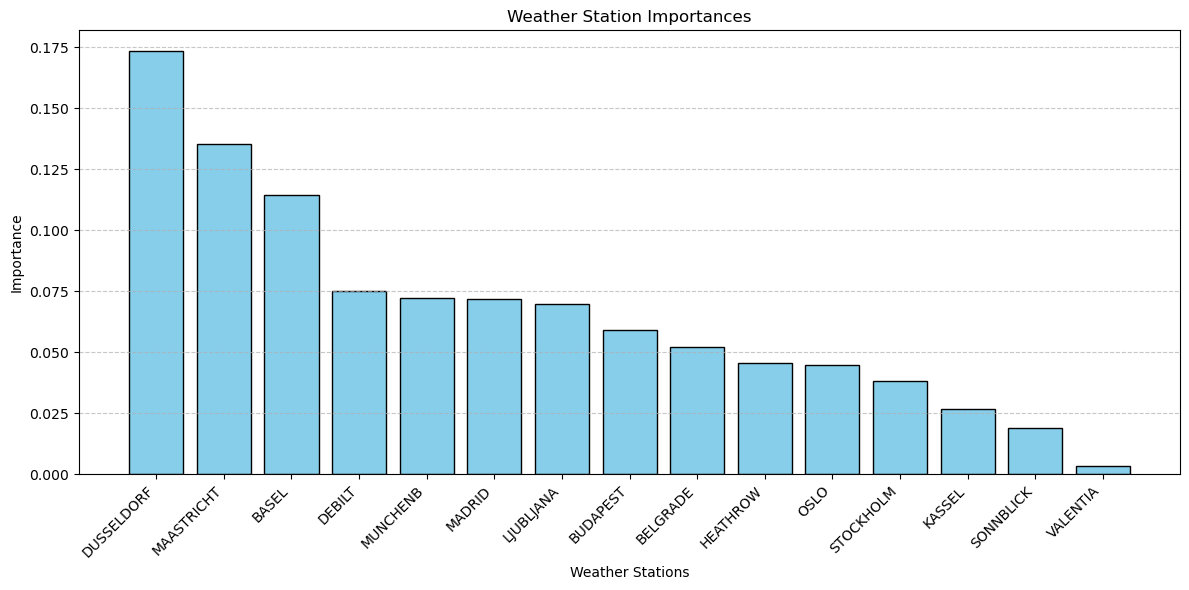

In [86]:
# Weather stations list
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 
                    'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 
                    'STOCKHOLM', 'VALENTIA']

# Pair weather stations with their importances and sort by importance descending
sorted_data = sorted(zip(weather_stations, weather_station_importance), key=lambda x: x[1], reverse=True)

# Unpack sorted data back into lists
sorted_weather_stations, sorted_importance = zip(*sorted_data)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_weather_stations, sorted_importance, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right') 
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.ylabel('Importance')
plt.xlabel('Weather Stations')
plt.title('Weather Station Importances')
plt.tight_layout()
plt.show()

## 4. Random forest model on top station for all years

In [100]:
df_dusseldorf_weather.head()

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   
1                       8                 0.89               1.0161   
2                       7                 0.95               1.0161   
3                       8                 0.86               1.0161   
4                       7                 0.92               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   
1                         0.18                      0.66                  0.5   
2                         0.12                      0.07                  0.0   
3                         0.12                      0.02                  0.0   
4                         0.12                      0.62                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
0                  10.0                  7.0                 11.5  
1                   8.2                  7.4                 11.0  
2                   7.1                  6.9                  9.1  
3                   6.8                  3.6                  8.0  
4                   7.7                  6.2                 11.0

In [102]:
df_dusseldorf_pleasant.head()

DUSSELDORF_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0

In [105]:
feature_names = df_dusseldorf_weather.columns

# Convert X and y into numpy arrays
X2 = df_dusseldorf_weather.to_numpy()
y2 = df_dusseldorf_pleasant.to_numpy()

In [107]:
# Check the shapes
print('X2 shape: ', X2.shape)
print('y2 shape: ', y2.shape)

X2 shape:  (22950, 9)
y2 shape:  (22950, 1)


In [109]:
#Split data into training and testing sets.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=39)

In [111]:
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(16065, 9) (16065, 1)
(6885, 9) (6885, 1)


### 4.1 Random Search Optimization

In [115]:
# Random search cv
rs_space={'max_depth':[5, 10, 15, 20, 25, None],
              'n_estimators':np.arange(50, 300, step=50),
              'max_features':randint(10, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(2,10),
              'min_samples_split':np.arange(2, 10, step=1)
         }

In [117]:
# creating a RF classifier
clf4= RandomForestClassifier()

In [129]:
start = time.time()
rf_random = RandomizedSearchCV(clf4, rs_space, n_iter=200, scoring='f1_weighted', verbose=2, n_jobs=-1, cv=3)
model_random = rf_random.fit(X2_train, y2_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Search took 0.6699265797932943 minutes


In [133]:
best_model = rf_random.best_estimator_
y2_pred = best_model.predict(X2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5397
           1       1.00      1.00      1.00      1488

    accuracy                           1.00      6885
   macro avg       1.00      1.00      1.00      6885
weighted avg       1.00      1.00      1.00      6885



In [135]:
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 91, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 100}
Best RANDOM search score is: 1.0


### 4.2 Grid Search Optimization

In [137]:
# Grid search cv
grid_space={'max_depth':[10, 20, 30, None],
               'n_estimators':[50,100,200],
              'max_features':[10, 50, 100],
            'criterion':['gini','entropy'],
              'min_samples_leaf':[1,5, 10],
              'min_samples_split':[2, 5, 10]
           }

In [141]:
# creating a RF classifier
clf6 = RandomForestClassifier()

In [143]:
start = time.time()
grid = GridSearchCV(clf6,param_grid=grid_space, scoring='f1_weighted', verbose=2, n_jobs=-1, cv=3)
model_grid = grid.fit(X2_train, y2_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Search took 1.709343675772349 minutes


In [144]:
best_model = grid.best_estimator_
y2_pred = best_model.predict(X2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5397
           1       1.00      1.00      1.00      1488

    accuracy                           1.00      6885
   macro avg       1.00      1.00      1.00      6885
weighted avg       1.00      1.00      1.00      6885



In [145]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


### 4.3 Run optimized random forest model on top station for all years

In [150]:
# Create a RF classifier with the best results from above
clf7 = RandomForestClassifier(n_estimators = 100, max_depth=25, max_features=91, min_samples_leaf=6, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf7.fit(X2_train, y2_train)

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=25, max_features=91,
                       min_samples_leaf=6, min_samples_split=4)

In [152]:
# Perform predictions on the test dataset
y2_pred = clf7.predict(X2_test)
  
# Print model accuracy
print("Model Accuracy: ", metrics.accuracy_score(y2_test, y2_pred))

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y2_test, y2_pred))

Model Accuracy:  1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5397
           1       1.00      1.00      1.00      1488

    accuracy                           1.00      6885
   macro avg       1.00      1.00      1.00      6885
weighted avg       1.00      1.00      1.00      6885



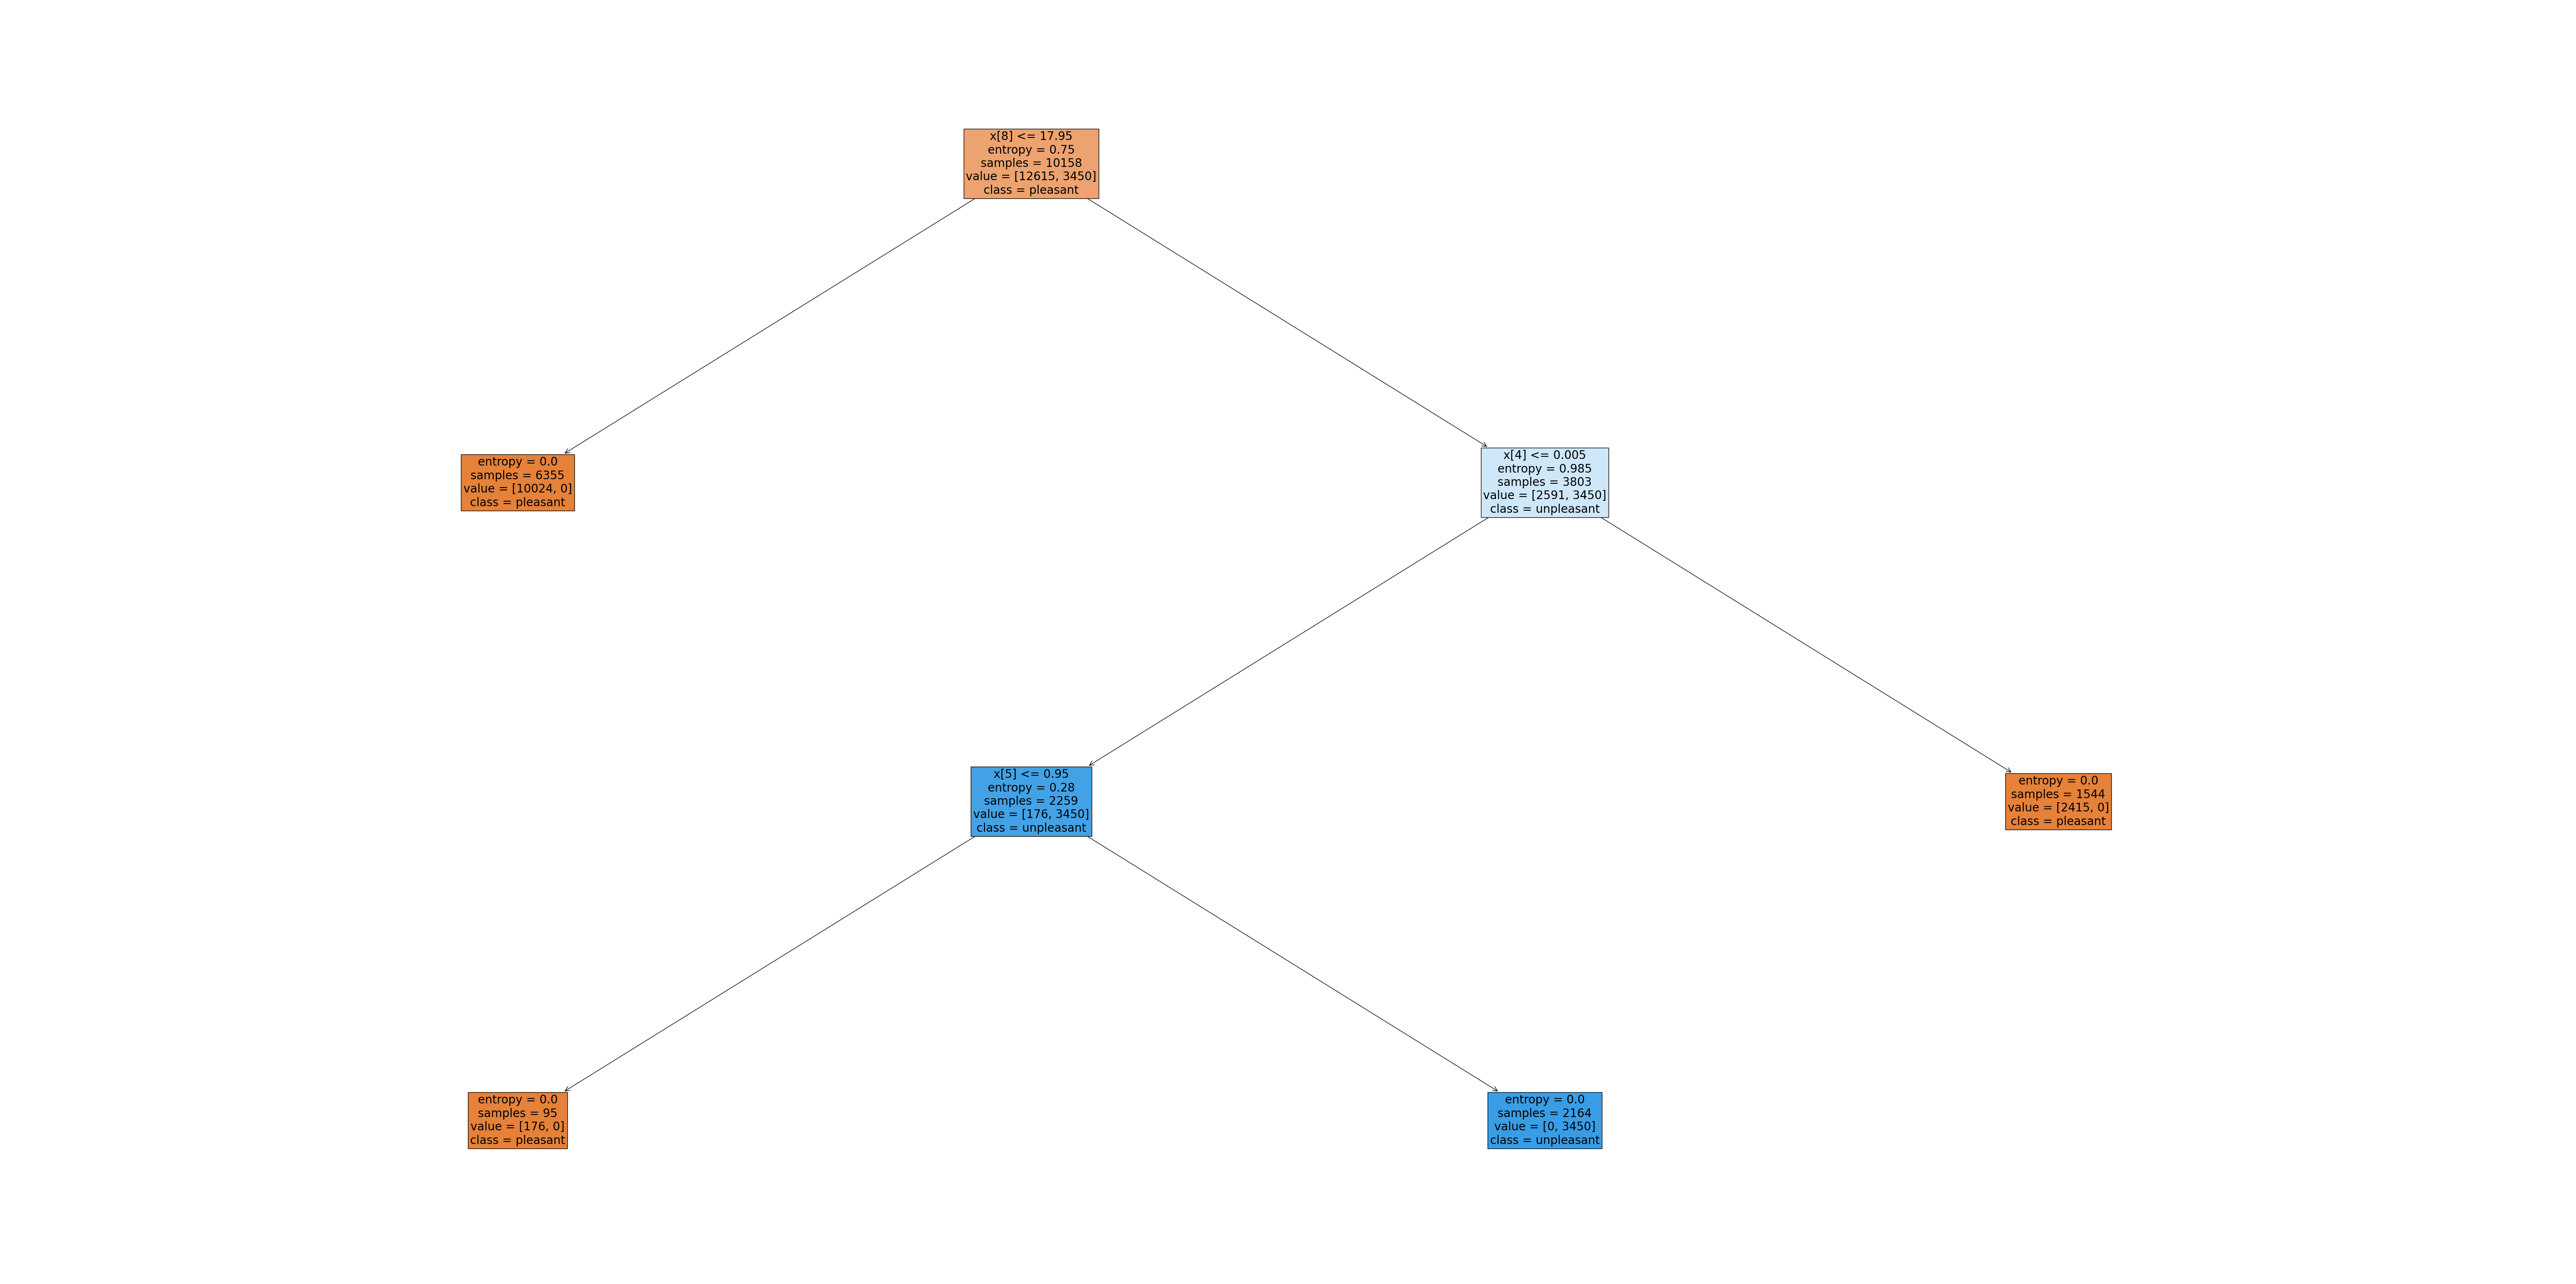

In [154]:
# Define the labels
labels = ['pleasant', 'unpleasant']

fig = plt.figure(figsize=(80,40))
plot_tree(clf7.estimators_[1], fontsize = 20, class_names=labels, filled=True);

In [158]:
# Extract feature importances
important = clf7.feature_importances_

print('Dusseldorf importances:\n', important)

Dusseldorf importances:
 [0.         0.         0.         0.         0.42172809 0.06797446
 0.         0.         0.51029745]


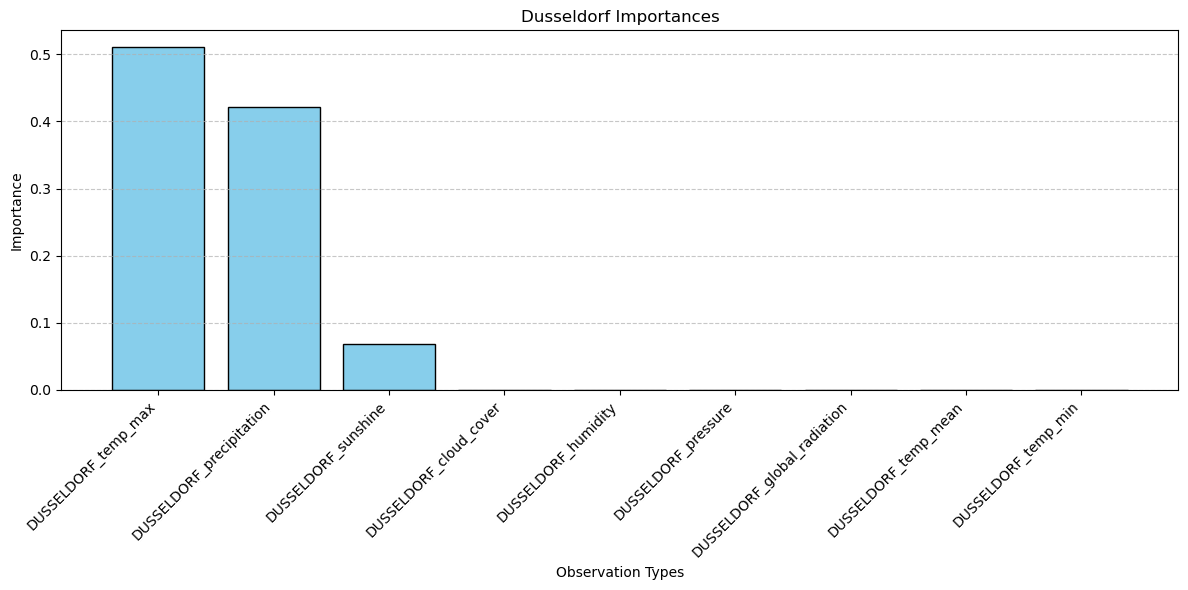

In [164]:
# Weather stations list
observation_types = ['DUSSELDORF_cloud_cover', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation',	'DUSSELDORF_precipitation', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max']

# Pair observation types with their importance values and sort by importance descending
sorted_data = sorted(zip(observation_types, important), key=lambda x: x[1], reverse=True)

# Unpack sorted data back into two lists
sorted_observation_types, sorted_importance = zip(*sorted_data)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_observation_types, sorted_importance, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right') 
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.ylabel('Importance')
plt.xlabel('Observation Types')
plt.title('Dusseldorf Importances')
plt.tight_layout() 
plt.show()